<a href="https://colab.research.google.com/github/OttavioCresos/Python-DSP/blob/main/03_HarmonicSeriesAndFFT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Part 3. The harmonic series & Getting started with FFT

In this lab we will explore the sonic and visual effects of adding together waveforms of different frequencies, and we will start using the FFT.

**Objectives:**

* Be comfortable generating sine waves and plotting waveforms in python
* Be able to experiment with adding harmonically related sounds together, deepening the understanding of the perception of harmonic sounds
* compute and visualise the magnitude spectrum for any audio (or other one-dimensional) signal
* look at an equation for a sine wave and sketch out the spectrum on paper

## Part 0. IPython & Sound Review

A short review of everything covered in the previous notebooks.

If needed, check this Librosa/IPython audio notebook:
<https://colab.research.google.com/github/iranroman/musicinformationretrieval.com/blob/gh-pages/ipython_audio.ipynb>

To refresh your memory, here is a summary of the commands for creating, plotting, and playing sound waves in IPython:


In [1]:
# importing libraries
import numpy as np
import matplotlib.pyplot as plt
import scipy as sci
# to display and export audio files, check first link on the previous text cell
import IPython.display as ipd
# declaring PI here so I don't need to call sci.pi every time
pi = np.pi
sin = np.sin
cos = np.cos

In [2]:
# create an array, t, whose elements begin at 0 and increase in increments of 1/44100, up to 1
# this is a list of points in time (in seconds)
t = np.arange(0, 1, 1/44100)
samplerate = 44100 # 44100 Hz
# create another array, each element of which is the value of a sine wave, computed at the corresponding point in time in t
s = 0.5 * sin(2 * pi * t * 440) #amplitude at 0.5 for ears safety

# provide a playback bar for playing s as an audio file, remember to specify the sample rate as RATE
ipd.Audio(s, rate =samplerate)

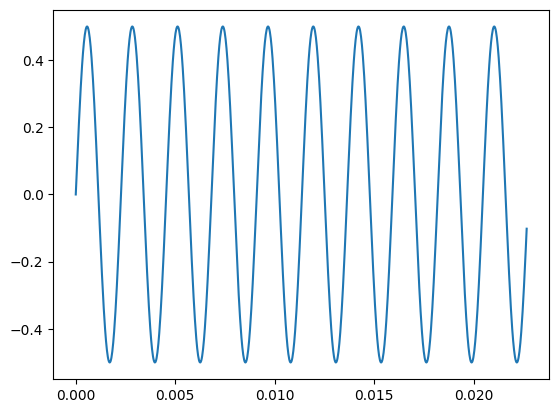

In [7]:
t = np.arange(0, 1, 1/samplerate) # t is an array of equally-spaced time points
s1 = 0.5 * sin(2 * pi * 440 * t) # s1 is sine wave at 440Hz, with amplitude 0.5
ipd.Audio(s1, rate = samplerate)
plt.plot(t[0:1000], s1[0:1000]) # plots just first 1000 samples of s1

And here is a refresher on how to add two sine waves (to play them simultaneously) or two concatenate them (to play them in sequence):

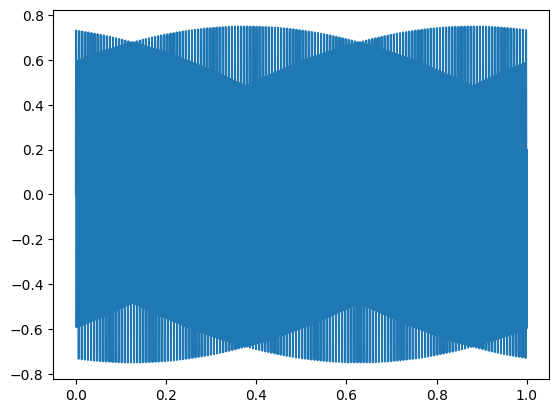

In [16]:
s2 = 0.25 * sin(2 * pi * 587.33 * t)
chord = s1 + s2 #plays simultaneously
# plotting:
plt.plot(t[0:100000], chord[0:100000]) #plots just first 1000 samples of chord
# audio rendering:
ipd.Audio(chord, rate = samplerate)

In [18]:
 # (play as a sequence instead)
sequence = np.concatenate([s1, s2])
ipd.Audio(sequence, rate = samplerate)

===================================================================
## Part 1. The harmonic series

When a series of sinusoids are all integer multiples of the same frequency (called the **fundamental frequency**), we call them **harmonics**. For example, 100Hz, 200Hz, 300Hz, and 400Hz are all harmonics, and the fundamental frequency is 100Hz (namely, they are 1, 2, 3, and 4 times the fundamental).

**Why is the harmonic series so important?**

### In acoustics:
1. When we add harmonically-related frequencies together, we will typically hear *just one note*, and the pitch of that note will be equal to the pitch of the fundamental.

1. The relative amplitudes of the harmonics are important in determining the *timbre* (or "tone colour") of a note.

1. Pitched acoustic instruments (e.g., a bowed violin string, a blown clarinet, a plucked guitar string) vibrate at a fundamental and its harmonics. The strengths of these harmonics are a big part of what differentiates the sound of one instrument from another.

### In computation with _any kind of signal_ (audio, image, animation, etc...):
1. <span style="color:red"> We can add harmonically-related sinusoids with carefully chosen amplitudes and phases together to create any periodic (repeating) waveform. </span>

## I. Playing in sequence

The following code creates a sequence of harmonically-related sines. This allows for **editing the number of harmonics and duration**.

Adding harmonic:  2
Adding harmonic:  3


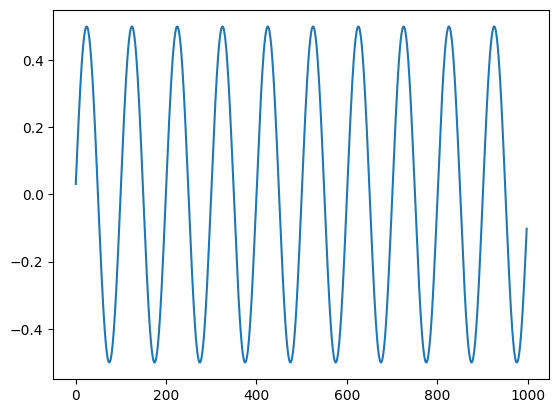

In [ ]:
t = np.arange(0, 0.5, 1/44100)
fundamental = 440
numHarmonics = 3
mySound = 0.5 * sin(2 * pi * t * 440)

for i in range(2, numHarmonics + 1):  #A for-loop where i starts at 2 and ends at numHarmonics
    print ("Adding harmonic: ", i)
    mySound = np.concatenate([mySound, 0.5 * sin(2 * pi * t * 440 * i)])

plt.plot(mySound[1:1000]) #plot first 1000 samples
mySound = ipd.Audio(mySound, rate = samplerate)

ipd.display(mySound) # need to use this command to display both the graph and the audio cell

## II. Playing simultaneously

In the code below, instead of playing one harmonic after the other, we are adding them together to be **played simultaneously**.

*Important tip: adjust the gain of each harmonic to ensure that your total gain is no more than 1, otherwise you will get distortion!*

Adding harmonic:  2
Adding harmonic:  3


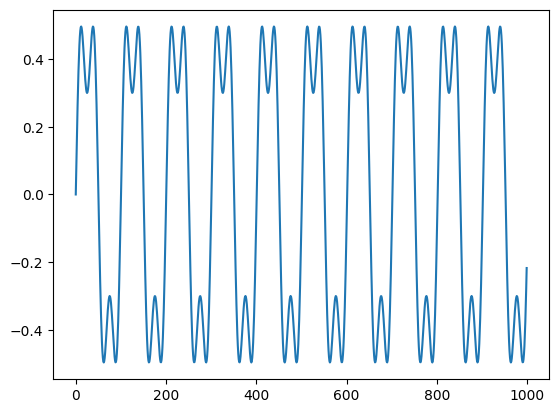

In [21]:
t = np.arange(0, 0.5, 1/44100) #duration and sample rate
fundamental = 440
numHarmonics = 3
mySound = 0.5 * sin(2 * pi * t * 440) # fundamental sineWave

for i in range(2,numHarmonics + 1):
    print ("Adding harmonic: ", i)


harmonics = 0.2 * sin(2 * pi * t * 440 * i)
myHarmonicSound = mySound + harmonics #playing everything simultaneously, gain is 0.7

# [mySound = np.concatenate([mySound, 0.5 * sin(2 * pi * t * 440 * i)]) sequencing instead!]

plt.plot(myHarmonicSound[0:1000]) # plot first 1000 samples
myHarmonicSound = ipd.Audio(myHarmonicSound, rate = samplerate)

ipd.display(myHarmonicSound) # need to use this command to display both the graph and the audio cell

## <span style="color:red">Some Extra resoning and questions about Part 1</span>

Before moving on to Part 2, **Let's answer the following questions**.

1. How does the sound change as you add more harmonics? (Try from 3 harmonics to up to 10 or more.)
*By adding an increasing number of harmonics, we won't obtain a pure sinusoidal tone anymore. As we are adding harmonically related harmonics (integer multiples of the fundamental tone) we will obtain an harmonic sound which high frequency range will be directly proportional to number of these. As we keep adding harmonics, the higher frequencies will stop being in the audio frequency range!*

    
2. How does the plot of the waveform change as you add more harmonics?

*It is still possible to recognize the fundamental A (440Hz), but the waveform will be more and more jagged as we add more harmonics.*

===================================================================


<hr>

## Aside: Creating a square wave by adding harmonically-related sinusoids

> To create a square wave with any fundamental frequency $f$, the $k^{th}$ sinusoid in your sum will have frequency $(2k-1)\times f$. This $k^{th}$ sinusoid will have amplitude $\frac{1}{(2k-1)}$. <br>
In other words, the final waveform can be expressed by the following summation: <br>
$$ s = \sum_{k=1}^{\infty} \frac{\sin(2\pi(2k-1)ft)}{2k-1}$$

<hr>

The for-loop below generates this sum of sine waves when there are 10 components.

* Try changing the number of components, and watch and listen how the waveform changes.
* Then, try changing the fundamental, and watch and listen how the waveform changes.
* Finally, try randomly change the _phase_ of each sinusoid (e.g., by adding a phase of `np.random.rand()*2*pi` for each sin inside your for-loop). (Note that you may have to normalize your waveform to restrict it to the range [-1, 1], by calling `mySound = mySound/max(mySound)` before plotting and playing it, to prevent distortion.)

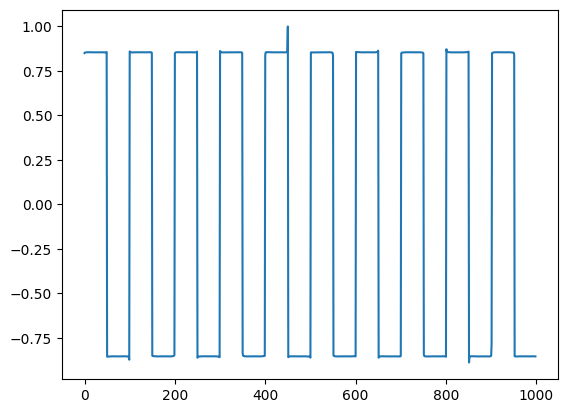

In [36]:
t = np.arange(0, 3, 1/44100)
fundamental = 440
numHarmonics = 1000
k = 1
mySound = sin(2 * pi * fundamental * t + 0) # phase can be 0 for now, we are going to randomise it later

for k in range(2, numHarmonics + 1):
    harmonicNumber = (2 * k - 1)
    mySound= mySound + sin(2 * np.pi * harmonicNumber * fundamental * t + 0) / harmonicNumber # replace this for phase randomisationb (np.random.rand()*2*pi)


mySound = mySound/max(mySound)
plt.plot(mySound[1:1000])
mySound = ipd.Audio(mySound, rate = samplerate)
ipd.display(mySound)
# This sinusoid is just starting to approximate a square wave as you can see! Adding more harmonics would shape it further

=================================================
## Part 2: Intro to The Fourier Transform

__Step 1.__
*   Creating a sinewave with a frequency of 2 Hz
*   an amplitude of 0.5
*   a phase offset of 0
*   Using a sample rate of 100Hz
*   generating the waveform for 1 second
*   Storing this wave in a variable called `x1`.

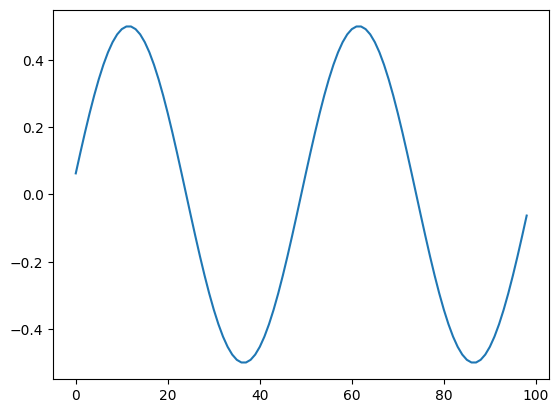

In [39]:
t = np.arange(0, 1, 1/100)
x1 = 0.5  * sin(2 * pi * 2 * t + 0) # added phase offset +0 just for clarity

plt.plot(x1[1:1000])

__Step 3.__ Sketch on paper what you think the spectrum should look like for `x1`. Label your x-axis "frequency", and let it range from 0 to 50Hz (the Nyquist frequency, the maximum frequency you can accurately represent at 100Hz). Label your y-axis "magnitude," and let it range from 0 upwards (don't worry about units).

__Step 4.__ We'll use the FFT to compute the spectrum of `x1`. To call this in IPython, you'll use the `fft` function, located within the `np.fft` package. You'll call this function using the syntax `np.fft.fft()`

For example, to see the documentation about the `np.fft` __package__, type

In [37]:
?np.fft

To see the documentation about the `fft` __function__ within this package, type


In [ ]:
?np.fft.fft

To compute the spectrum of `x1` and store it in a variable called `spec`, just call

In [40]:
spec = np.fft.fft(x1)

Note that `spec` is an __array of complex numbers__. Note also that Python uses `j` for the imaginary $\sqrt{-1}$, __not__ `i`. Make sure you understand what's being done in the following code:

In [41]:
print ("The first spectrum element is ", spec[0])
print ("The magnitude of the first element is ", abs(spec[0]))
print ("The length of the spectrum is ", np.size(spec))

The first spectrum element is  (2.33486982377251e-16+0j)
The magnitude of the first element is  2.33486982377251e-16
The length of the spectrum is  100


Many functions in python can be applied to an entire array at once, without using a for-loop. `abs()` is one of those functions.

Therefore, to compute a new array that just contains the __magnitudes__ of each component of the spectrum, call:

In [42]:
magspec = abs(spec)

The magnitude spectrum is just an array of real numbers, so you can plot it using the usual plot command:

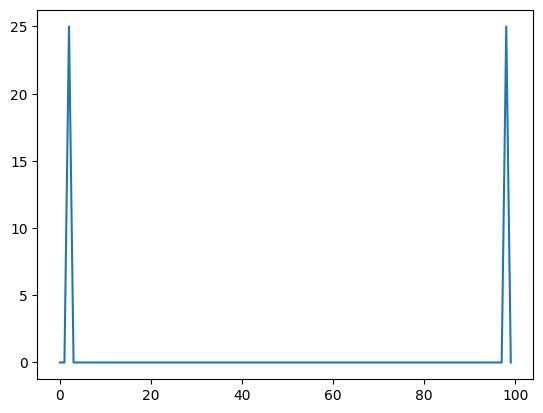

In [43]:
plt.plot(magspec)

__Step 5.__ Does the spectrum you plotted above look like your sketch from step 3? Hopefully it does __NOT!__

Why not? Notice that you've plotted the spectrum for frequencies from 0 to 100Hz (on the x-axis!) However, what you want to plot is the frequencies between 0 and the Nyquist frequency of 50Hz.

To access the first *n* elements of some array `a` in python, you can use the shorthand `a[0:n]`. Plot the spectrum for frequencies only between 0 and the Nyquist frequency by:

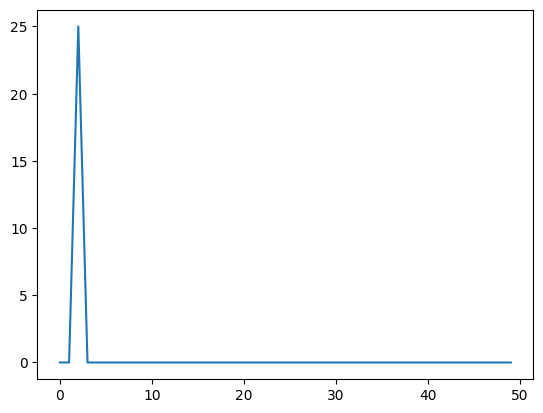

In [ ]:
plt.plot(magspec[0:50])

<StemContainer object of 3 artists>

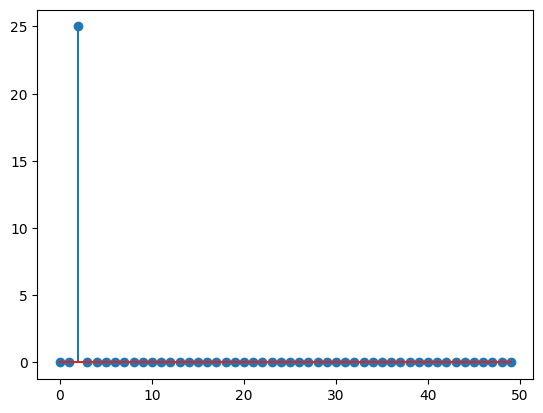

In [ ]:
plt.stem(magspec[0:50])
#Also, try "zooming in" further to verify that the peak is at 2 Hz, like:
#stem(spec[0:5])

__Step 6.__ Now let's repeat the process for a few more waveforms, all sampled at 100Hz for 1 second.

a. Create a variable `x2`, with an amplitude of 0.5, a frequency of 4Hz, and a phase offset of 0.

b. Sketch on paper what you expect the magnitude spectrum of `x2` to look like.

c. Create a variable `x3` which is the sum of `x1` and `x2`.

d. Sketch what you expect the magnitude spectrum of `x3` to look like.

e. Compute the spectrum of `x2` and store it in the variable `spec2`.

f. Compute the spectrum of `x3` and store it in the variable `spec3`.

g. Plot the magnitude spectra for `x2` and `x3`, remembering to use the `abs` function __and__ to plot the spectrum only for the frequencies from 0 to the Nyquist frequency.

<span style="color:red">
Make sure that your code-generated spectra look the same as your sketches. <br> Also make sure that your spectrum for `x3` looks the same as if you added the spectra for `x1` and `x2` together. <br> If not, raise your hand to talk with an instructor.
</span>

<StemContainer object of 3 artists>

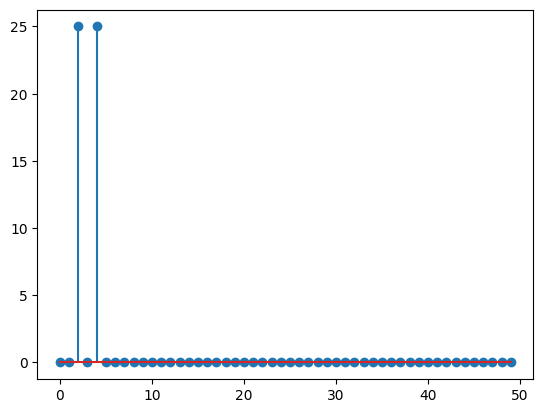

In [46]:
t = np.arange(0, 1, 1/100) #sample at 100Hz, for 1 second
x1 = 0.5  * sin(2 * pi * 2 * t + 0)
x2 = 0.5  * sin(2 * pi * 4 * t + 0) #amplitude of 0.5, 4Hz, phase offset = 0
x3 = x1 + x2
spec1 = np.fft.fft(x1)
spec2 = np.fft.fft(x2)
spec3 = np.fft.fft(x3)
magspec = abs(spec3)
plt.stem(magspec[0:50])